## Final Project Submission

Please fill out:
* Student name: Jim Petoskey
* Student pace: self paced
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


## Ideas for project
* How much should Redfin pay for a given house? And, are there houses Redfin shouldn't buy?  If so, which ones?
    * buy houses with predictable value at 5% below predicted sale value.
        * Predictability of sale value determined by low R squared value.
    * how many houses did sell for a predicted value based on our model?
        * e.g. we use data from 2009-2013 to make model and test it on sales in the 2014-2018 range.

# Exploring Data

In [7]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline

In [2]:
house_df = pd.read_csv('data/kc_house_data.csv')
#column_names = pd.read_csv('data/column_names.md')

## What's in kc_house_data?

In [3]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [6]:
house_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [4]:
numericals = house_df[['bedrooms', 
                       'bathrooms', 
                       'sqft_living', 
                       'sqft_lot', 
                       'floors',
                       'sqft_above',
                       'yr_built',
                       'yr_renovated',
                       'zipcode', 
                       'sqft_living', 
                       'sqft_lot15']]
y = house_df['price']

numericals.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,sqft_living,sqft_lot15
0,3,1.00,1180,5650,1.0,1180,1955,0.0,98178,1180,5650
1,3,2.25,2570,7242,2.0,2170,1951,1991.0,98125,2570,7639
2,2,1.00,770,10000,1.0,770,1933,NaN,98028,770,8062
3,4,3.00,1960,5000,1.0,1050,1965,0.0,98136,1960,5000
4,3,2.00,1680,8080,1.0,1680,1987,0.0,98074,1680,7503


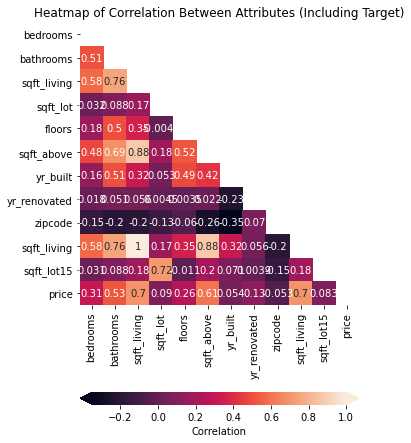

In [6]:
# Create a df with the target as the first column,
# then compute the correlation matrix
heatmap_data = pd.concat([numericals, y], axis=1)
corr = heatmap_data.corr()

# Set up figure and axes
fig, ax = plt.subplots(figsize=(5, 8))

# Plot a heatmap of the correlation matrix, with both
# numbers and colors indicating the correlations
sns.heatmap(
    # Specifies the data to be plotted
    data=corr,
    # The mask means we only show half the values,
    # instead of showing duplicates. It's optional.
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    # Specifies that we should use the existing axes
    ax=ax,
    # Specifies that we want labels, not just colors
    annot=True,
    # Customizes colorbar appearance
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

First, I will build a model with the top three numerical values, then I will examine and likely add-in categoricals after one-hot-encoding the non-numericals.

The top three predictors are: sqft_living, (dropping sqft_above - see explanation below), bathrooms, and bedrooms.

I will drop either sqft_living or sqft_above because they  exhibit strong correlation to each other and likely strong multicollinearity.  Considering sqft_living has a stronger correlation to price, which is our target, I will drop sqft_above.

In [9]:
# Set top three numerical values
t3_numericals = house_df[['sqft_living', 'bathrooms', 'bedrooms']]

# Standard Scaler

# Model Summary
sm.OLS(y, sm.add_constant(t3_numericals)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     7401.
Date:                Fri, 18 Feb 2022   Prob (F-statistic):               0.00
Time:                        12:31:15   Log-Likelihood:            -2.9975e+05
No. Observations:               21597   AIC:                         5.995e+05
Df Residuals:                   21593   BIC:                         5.995e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        7.639e+04   6956.321     10.981      0.000    6.28e+04       9e+04
sqft_living   310.1848      3.101    100.011      0.000     304.106     316.264
bathrooms    7659.0953   3523.302      2.174      0.030     753.163    1.46e+04
bedrooms    -5.857e+04   2347.628    -24.950      0.000   -6.32e+04    -5.4e+04
==============================================================================
Omnibus:                    14417.262   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           490912.091
Skew:                           2.734   Prob(JB):                         0.00
Kurtosis:                      25.707   Cond. No.                     9.36e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.36e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""